# Thomas Fermi Potential

The potential can be defined by the differential equation $x^{1/2}\frac{d^2\phi_0}{dx^2} = \phi_0^{3/2}$. This is a non-linear ODE boundary-value problem. The scipy library `scipy.integrate.solve_bvp` might be able to do it. 

In [1]:
import numpy as np
import scipy.integrate as integrate

xmax = 10000

#define the differential equation by defining f(x,y)
def f(x,y):
  
  x = np.asarray(x,dtype=np.complex)
  y = np.asarray(y,dtype=np.complex)
  trow = y[1]
  brow = y[0]**(3/2)*x**(-1/2)
  #brow = y[0]
  trow=np.real(trow)
  brow=np.real(brow)
  #print(np.shape(trow))
  #print(np.shape(brow))
  out = np.stack((trow,brow))
  #print(np.shape(out))
  #out = np.reshape(out,(np.shape(y)[0],np.shape(x)[0]))
  #print(np.shape(out))
  return out

#define the mesh
dx = 0.1
xmesh = np.arange(1e-3,xmax,dx)
#xmesh = np.arange(0,xmax,dx)
print(np.shape(xmesh))

#guess a solution
import intdiff as id
y1 = id.getgradphi0('numeric','data/phi0_NACI_format_mod.txt')
y0 = id.getphi0('numeric','data/phi0_NACI_format_mod.txt')
y1v = np.vectorize(y0)
y0v = np.vectorize(y1)
yguess = np.stack((np.asarray(y0(xmesh),dtype=np.float64),np.asarray(y1(xmesh),dtype=np.float64)),axis=0)
#yguess = np.stack((np.asarray(np.exp(-xmesh),dtype=np.float64),np.asarray(np.exp(-xmesh),dtype=np.float64)),axis=0)
#print(yguess)

#define the boundary conditions on the vector y evaluated 
#at each end of the mesh [a,b] or xmesh[0] xmesh[-1]
#print(y0(xmesh[0]))
#print(y0(0))
#print(xmesh[0])
def bc(ya,yb):
   
  #print(ya[0])
  #print(yb[1])
  out = np.asarray([ya[0]-y0(xmesh[0]),yb[0]-(144/xmax**3)],dtype=np.float64)
  #out = np.asarray([ya[0]-np.exp(-xmesh[0]),yb[0]-np.exp(-xmesh[-1])],dtype=np.float64)
    
  return out



#a = np.asarray([1,2,3,4,5,6,7,8,9,10])
#b = np.asarray([3,5])
print(np.shape(f(xmesh,yguess)))
#print(np.shape(bc(b,b)))
#print(bc([np.exp(-xmesh[0]),np.exp(-xmesh[0])],[np.exp(-xmesh[-1]),np.exp(-xmesh[-1])]))

(100000,)
(2, 100000)


In [2]:
#solve the thing
print(np.shape(f(xmesh,yguess)))
print(np.shape(xmesh))
print(np.shape(yguess))
print(np.shape(bc(yguess[0],yguess[-1])))
#a = integrate.solve_bvp(f,bc,xmesh,yguess,max_nodes=1000,verbose=1,tol=1)
a = integrate.solve_bvp(f,bc,xmesh,yguess,max_nodes=500000,verbose=1)
print(a.status)
print(a.success)


(2, 100000)
(100000,)
(2, 100000)
(2,)
Solved in 7 iterations, number of nodes 100014, maximum relative residual 6.88e-04.
0
True


In [3]:
#print(a.x)
#print(a.y)
print(a.sol(0)[1])

-1.5662233767652467


In [4]:
f_LT = id.getphi0('LT')
f_HT = id.getphi0('HT')

fpr_LT = id.getgradphi0('LT')
fpr_HT = id.getgradphi0('HT')

In [5]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

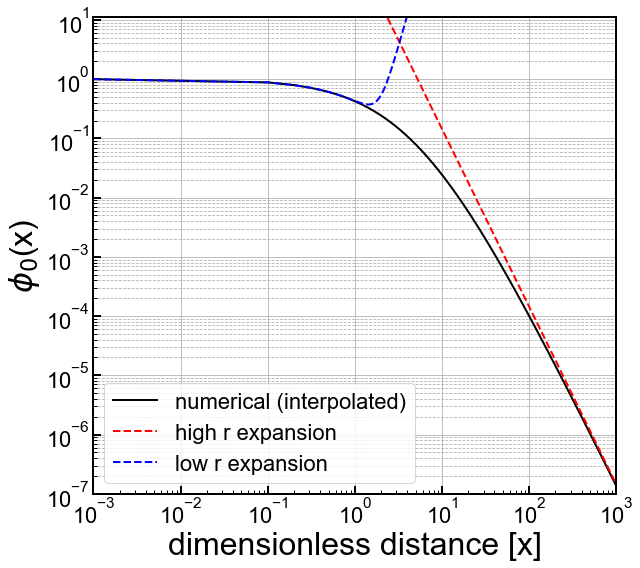

In [6]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

dx=0.1
X  = np.arange(0.001,1000,dx)



ax1.plot (X, a.sol(X)[0], 'k-', label='numerical (interpolated)')
ax1.plot (X, f_HT(X), 'r--', label='high r expansion')
ax1.plot (X, f_LT(X), 'b--', label='low r expansion')
#ax1.plot (X, f_match(X), 'm--', label='matched')
#ax1.plot (X, ylind(X), 'k--', label='Lindhard')
#ax1.plot (X[X>0],ysingle(X[X>0]),'k-',linewidth=1)


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.001, 1000)
ax1.set_ylim(1e-7,11.1)
ax1.set_xlabel('dimensionless distance [x]',**axis_font)
ax1.set_ylabel('$\phi_0$(x)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/TF-potential-wApprox-MyCalc.png')
plt.show()

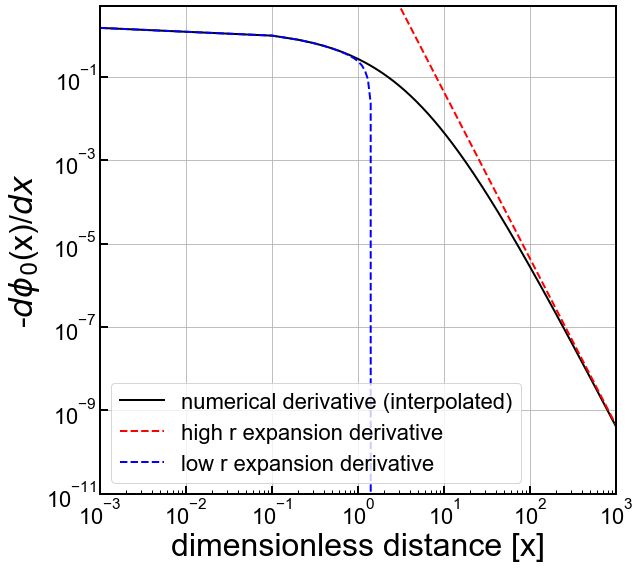

In [7]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

dx=0.1
X  = np.arange(0.001,1000,dx)


ax1.plot (X, -a.sol(X)[1], 'k-', label='numerical derivative (interpolated)')
ax1.plot (X, -fpr_HT(X), 'r--', label='high r expansion derivative')
ax1.plot (X, -fpr_LT(X), 'b--', label='low r expansion derivative')
#ax1.plot (X, ylind(X), 'k--', label='Lindhard')
#ax1.plot (X[X>0],ysingle(X[X>0]),'k-',linewidth=1)


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.001, 1000)
ax1.set_ylim(1e-11,5)
ax1.set_xlabel('dimensionless distance [x]',**axis_font)
ax1.set_ylabel('-$d\phi_0$(x)/$dx$',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/TF-potential-diffs-wApprox-MyCalc.png')
plt.show()